# **Detecção de Fraudes em Transações Financeiras**

Luiz Henrique Rigo Faccio | CCR de `Inteligência Artifical`

*Ciência da Computação - Universidade Federal Da Fronteira Sul*

Dataset disponível em: [https://www.kaggle.com/datasets/aryan208/financial-transactions-dataset-for-fraud-detection](https://www.kaggle.com/datasets/aryan208/financial-transactions-dataset-for-fraud-detection)

## **Importando bibliotecas e o dataset**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import datetime as dt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler

In [48]:
path = "archive/financial_fraud_detection_dataset.csv"
dataSet = pd.read_csv(path)

## **Vizualizando as informações**

In [3]:
def numeric_columns(dataSet):
    return dataSet.select_dtypes(include=['int64', 'float64']).columns
def categorical_columns(dataSet): 
    return dataSet.select_dtypes(include=['object']).columns

def analyse_target(dataSet):
    print("Target:")
    dataSet["is_fraud"].value_counts().plot(kind='bar', title='Distribuição da variável alvo')
    total = dataSet.shape[0]
    counts = dataSet["is_fraud"].value_counts()
    percentages = counts / total * 100
    for value, count in counts.items():
        print(f"Classe {value}: {count} ({percentages[value]:.4f}%)")

def analyze_data(dataSet):
    info = pd.DataFrame({"Tipos":dataSet.dtypes, "Valores únicos": dataSet.nunique(), "Valores Nulos": dataSet.isnull().sum()})
    
    print("Dimensão do dataset: ", dataSet.shape)
    display(info)

    print("Informações contínuas:")
    display(dataSet[numeric_columns(dataSet)].describe().round(3))

    if (categorical_columns(dataSet).size > 0):
        print("Informações categóricas:")
        display(dataSet[categorical_columns(dataSet)].describe().round(3))

    analyse_target(dataSet)

    print("Amostra do dataset:")
    display(dataSet.sample(5))

Dimensão do dataset:  (5000000, 18)


,Tipos,Valores únicos,Valores Nulos
transaction_id,object,5000000,0
timestamp,object,4999998,0
sender_account,object,896513,0
receiver_account,object,896639,0
amount,float64,217069,0
transaction_type,object,4,0
merchant_category,object,8,0
location,object,8,0
device_used,object,4,0
is_fraud,bool,2,0


Informações contínuas:


,amount,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score
count,5000000.000,4103487.000,5000000.000,5000000.000,5000000.000
mean,358.934,1.526,-0.000,10.501,0.500
std,469.933,3576.569,1.001,5.767,0.289
min,0.010,-8777.814,-5.260,1.000,0.000
25%,26.570,-2562.376,-0.680,5.000,0.250
50%,138.670,0.844,0.000,11.000,0.500
75%,503.890,2568.339,0.670,16.000,0.750
max,3520.570,8757.758,5.020,20.000,1.000


Informações categóricas:


,transaction_id,timestamp,sender_account,receiver_account,transaction_type,merchant_category,location,device_used,fraud_type,payment_channel,ip_address,device_hash
count,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,179553,5000000,5000000,5000000
unique,5000000,4999998,896513,896639,4,8,8,4,1,4,4997068,3835723
top,T100000,2023-12-14T01:56:37.401698,ACC983922,ACC400278,deposit,retail,Tokyo,mobile,card_not_present,wire_transfer,135.227.29.146,D7441961
freq,1,2,20,23,1250593,626319,625994,1251131,179553,1251219,2,9


Target:
Classe False: 4820447 (96.4089%)
Classe True: 179553 (3.5911%)
Amostra do dataset:


,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
1275826,T1375826,2023-04-11T16:42:42.913057,ACC729177,ACC841405,81.29,withdrawal,utilities,New York,mobile,False,NaN,NaN,-0.20,1,0.09,card,27.54.110.78,D7441401
2920552,T3020552,2023-09-02T22:43:11.193067,ACC704795,ACC640004,89.24,payment,grocery,Dubai,pos,False,NaN,1231.572622,1.17,6,0.79,card,139.152.239.94,D5552748
761304,T861304,2023-07-05T12:37:37.523900,ACC149119,ACC918932,104.55,payment,entertainment,London,mobile,False,NaN,-1140.914262,-0.46,20,0.13,card,231.154.230.165,D1333672
2018886,T2118886,2023-09-29T22:40:05.611202,ACC430821,ACC520172,13.87,payment,travel,London,pos,False,NaN,1557.806289,0.18,19,0.35,card,71.13.61.255,D9227250
943277,T1043277,2023-08-10T18:47:48.727370,ACC440181,ACC746256,78.42,payment,grocery,Sydney,mobile,False,NaN,NaN,-0.80,2,0.05,ACH,83.71.46.4,D6202963


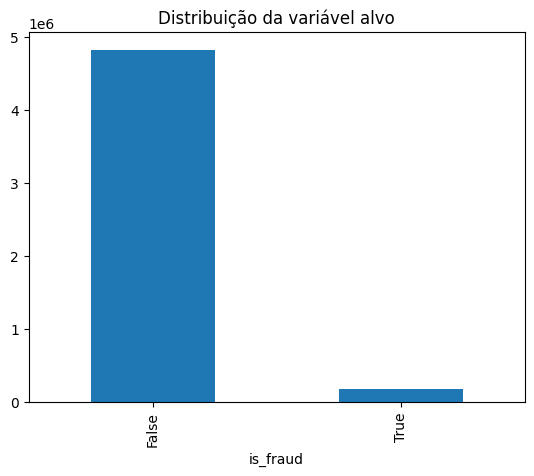

In [49]:
analyze_data(dataSet)

## **Tratando os dados**

Algumas informações como IDs, tipo de fraude, números de contas e números de dispositivos são inúteis nesta situação

time_since_last_transaction tem muitos valores vazios

In [5]:
useLess = ["transaction_id", "sender_account", "receiver_account", "ip_address", "device_hash", "fraud_type", "time_since_last_transaction"]

dataSet = dataSet.drop(columns=useLess)

Para não descartar os horários das transações, eles serão agrupados em madrugada, manha, tarde e noite.

In [6]:
def categorize_timestamp(timestamps : pd.Series, int_values: bool = False) -> pd.Series:
    """Função para categorizar timestap em períodos: manhã, tarde, noite e madrugada

    Args:
        timestamps (pd.Series): Coluna de timestamp do DataSet
    
    Returns:
        periodos (pd.Series): Coluna de timestamps já categorizada
    """
    
    def get_period(hour):

        if int_values:
            return hour
        if 6 <= hour < 9:
            return "manha_1"
        if 9 <= hour < 12:
            return "manha_2"
        elif 12 <= hour < 15:
            return "tarde_1"
        elif 15 <= hour < 18:
            return "tarde_2"
        elif 18 <= hour < 21:
            return "noite_1"
        elif 18 <= hour < 21:
            return "noite_2"
        elif 21 <= hour < 23:
            return "tarde_2"
        elif 23 <= hour < 2:
            return "tarde_2"
        elif 2 <= hour < 5:
            return "madrugada_1"
        else:
            return "madrugada_2"

    periodos = timestamps.apply(lambda x: get_period(dt.datetime.fromisoformat(x).hour))
    return periodos
    

In [7]:
dataSet["timestamp"] = categorize_timestamp(dataSet["timestamp"], int_values=True)

Como não existem mais dados faltantes, não será necessário imputá-los

As informações categóricas serão tratadas com o uso de OneHotEncoding e os dados numéricos serão escalados com o uso de StandartScaler (Somente para RNA)

Os valores de y (is_fraud) serão transformados em inteiros

In [8]:
encoder = OneHotEncoder()
encoder.fit(dataSet[categorical_columns(dataSet)])
encoded_data = encoder.transform(dataSet[categorical_columns(dataSet)])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_columns(dataSet)))
dataSet = dataSet.drop(columns=categorical_columns(dataSet))
dataSet = pd.concat([dataSet, encoded_df], axis=1)

In [9]:

dtc_dataset = dataSet.copy()
dtc_dataset["is_fraud"] = dtc_dataset["is_fraud"].map(lambda x: 1 if x == True else 0)

sacaler = StandardScaler()
dataSet[numeric_columns(dataSet)] = sacaler.fit_transform(dataSet[numeric_columns(dataSet)])

dataSet["is_fraud"] = dataSet["is_fraud"].map(lambda x: 1 if x == True else 0)
rna_dataset = dataSet 


Dimensão do dataset:  (5000000, 34)


,Tipos,Valores únicos,Valores Nulos
timestamp,float64,24,0
amount,float64,217069,0
is_fraud,int64,2,0
spending_deviation_score,float64,917,0
velocity_score,float64,20,0
geo_anomaly_score,float64,101,0
transaction_type_deposit,float64,2,0
transaction_type_payment,float64,2,0
transaction_type_transfer,float64,2,0
transaction_type_withdrawal,float64,2,0


Informações contínuas:


,timestamp,amount,is_fraud,spending_deviation_score,velocity_score,geo_anomaly_score,transaction_type_deposit,transaction_type_payment,transaction_type_transfer,transaction_type_withdrawal,...,location_Tokyo,location_Toronto,device_used_atm,device_used_mobile,device_used_pos,device_used_web,payment_channel_ACH,payment_channel_UPI,payment_channel_card,payment_channel_wire_transfer
count,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,...,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000,5000000.000
mean,-0.000,0.000,0.036,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,...,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000
std,1.000,1.000,0.186,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.661,-0.764,0.000,-5.255,-1.648,-1.732,-0.578,-0.577,-0.577,-0.577,...,-0.378,-0.378,-0.577,-0.578,-0.577,-0.577,-0.577,-0.577,-0.577,-0.578
25%,-0.939,-0.707,0.000,-0.679,-0.954,-0.866,-0.578,-0.577,-0.577,-0.577,...,-0.378,-0.378,-0.577,-0.578,-0.577,-0.577,-0.577,-0.577,-0.577,-0.578
50%,-0.072,-0.469,0.000,0.000,0.086,-0.000,-0.578,-0.577,-0.577,-0.577,...,-0.378,-0.378,-0.577,-0.578,-0.577,-0.577,-0.577,-0.577,-0.577,-0.578
75%,0.795,0.308,0.000,0.670,0.953,0.866,1.732,1.732,1.732,-0.577,...,-0.378,-0.378,-0.577,1.731,-0.577,1.732,1.732,-0.577,-0.577,1.731
max,1.662,6.728,1.000,5.016,1.647,1.732,1.732,1.732,1.732,1.733,...,2.643,2.647,1.732,1.731,1.733,1.732,1.732,1.733,1.732,1.731


Target:
Classe 0: 4820447 (96.4089%)
Classe 1: 179553 (3.5911%)
Amostra do dataset:


,timestamp,amount,is_fraud,spending_deviation_score,velocity_score,geo_anomaly_score,transaction_type_deposit,transaction_type_payment,transaction_type_transfer,transaction_type_withdrawal,...,location_Tokyo,location_Toronto,device_used_atm,device_used_mobile,device_used_pos,device_used_web,payment_channel_ACH,payment_channel_UPI,payment_channel_card,payment_channel_wire_transfer
4238270,-0.938643,-0.244703,0,0.360098,-1.647578,0.069190,-0.577533,-0.577485,-0.577453,1.733313,...,2.643350,-0.377739,-0.577239,-0.577699,-0.577091,1.731985,-0.577424,-0.576995,-0.577256,1.730925
4389168,0.072724,-0.006393,0,-1.198645,0.780094,0.969982,-0.577533,1.731646,-0.577453,-0.576930,...,-0.378308,-0.377739,1.732383,-0.577699,-0.577091,-0.577372,1.731828,-0.576995,-0.577256,-0.577726
755575,-1.661047,0.537408,0,-1.628298,1.473715,0.415649,1.731503,-0.577485,-0.577453,-0.576930,...,-0.378308,-0.377739,-0.577239,1.731007,-0.577091,-0.577372,-0.577424,1.733117,-0.577256,-0.577726
2441119,0.506166,-0.738901,0,-1.168669,-1.647578,-0.242622,-0.577533,-0.577485,1.731742,-0.576930,...,-0.378308,2.647327,-0.577239,-0.577699,-0.577091,1.731985,-0.577424,1.733117,-0.577256,-0.577726
4046719,-0.649681,2.776640,0,-0.818951,-0.433742,-0.693018,1.731503,-0.577485,-0.577453,-0.576930,...,-0.378308,2.647327,-0.577239,-0.577699,-0.577091,1.731985,-0.577424,-0.576995,1.732334,-0.577726


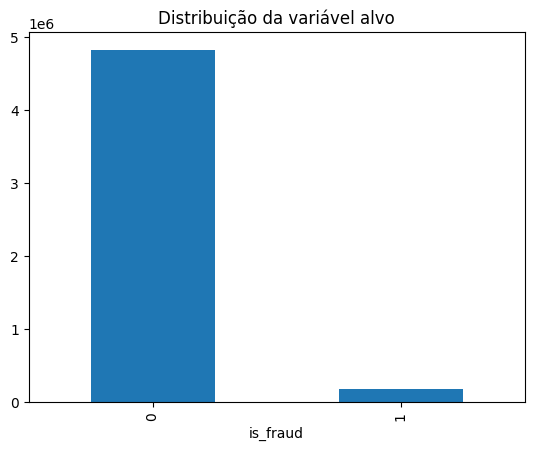

In [10]:
analyze_data(rna_dataset)

## **Ajustando classes**

É facilmente identificável a imparidade no número de amostras de cada classe.
Isso pode implicar em severas consequências na sensibilidade e habilidade de generalização dos modelos treinados

Apesar da discrepância relativa ser grande, o número absoluto de amostras da classe menos frequente (`is_fraud == 1`) é significativo: 179553

Desta forma, para resolver o problema, será realizado um *undersampling* da classe dominante. Isto é, remover um número de amostras da classe dominante para que ambas classes possuam valores similares de exemplos

Target:
Classe 0: 179553 (50.0000%)
Classe 1: 179553 (50.0000%)


,timestamp,amount,is_fraud,spending_deviation_score,velocity_score,geo_anomaly_score,transaction_type_deposit,transaction_type_payment,transaction_type_transfer,transaction_type_withdrawal,...,location_Tokyo,location_Toronto,device_used_atm,device_used_mobile,device_used_pos,device_used_web,payment_channel_ACH,payment_channel_UPI,payment_channel_card,payment_channel_wire_transfer
953272,22,1622.34,1,0.35,15,0.28,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4225657,22,16.61,1,0.20,16,0.92,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1550771,1,817.16,0,0.25,16,0.47,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4763181,6,109.08,1,-0.97,18,0.71,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2548586,1,120.34,0,2.26,1,0.85,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


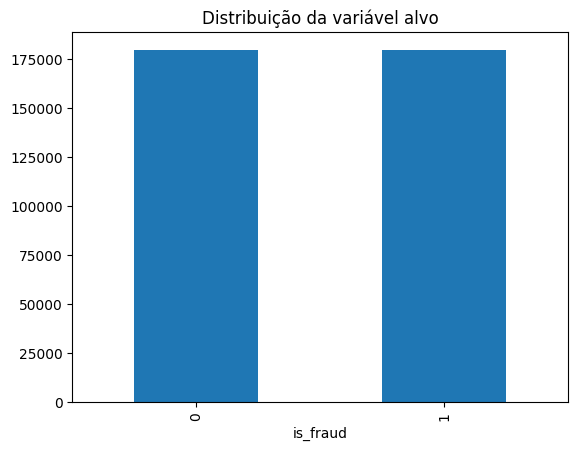

In [11]:
undersampler = RandomUnderSampler(random_state=42)
rna_resampled, _ = undersampler.fit_resample(rna_dataset, rna_dataset["is_fraud"])
dtc_resampled, _ = undersampler.fit_resample(dtc_dataset, dtc_dataset["is_fraud"])

analyse_target(dtc_resampled)
dtc_resampled.sample(5)

## **Encontrando os melhores parametros**

Com as classes balanceadas e o dataset tratado o passo seguinte é encontrar os melhores parâmetros para que o modelos de Árvore de Decisão e *Multi Layer Perceptron* sejam mais eficientes

Para isso, será feita uma grid search em alguns parâmetros possíveis

Entretanto, antes de performar a grid search, será separada uma amostra menor do dataset para que viabilizar a realização do processo no tempo disponível para a RNA

In [50]:
shrinked_rna_dataset_X, _, shrinked_rna_dataset_y, _ = train_test_split(rna_resampled, rna_resampled["is_fraud"], train_size=0.1, stratify=rna_resampled["is_fraud"], random_state=42)  #10% do dataset

print(shrinked_rna_dataset_X.shape)

(35910, 34)


In [42]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [2, 7],
    'max_features': ['sqrt', 'log2'],
}

model = DecisionTreeClassifier(random_state=42)

grid_search_dtc = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring=['f1', 'accuracy'],
    refit='f1', 
    verbose=0,
    n_jobs=-1
)

grid_search_dtc.fit(dtc_resampled, dtc_resampled["is_fraud"])

print("Best parameters found:", grid_search_dtc.best_params_)
print("Best cross-validation score:", grid_search_dtc.best_score_)


Best parameters found: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 20}
Best cross-validation score: 0.9691178969507274


In [40]:

param_grid = {
    'hidden_layer_sizes': [(50,), (100, 50), (34, 100, 150, 50, 2)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

model = MLPClassifier(random_state=42)

grid_search_rna = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='f1', 
    verbose=1,
    n_jobs=-1
)

grid_search_rna.fit(shrinked_rna_dataset_X, shrinked_rna_dataset_y)

print("Best parameters found:", grid_search_rna.best_params_)
print("Best cross-validation score:", grid_search_rna.best_score_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score: 1.0


## **Treinando Modelos**

Separando os dados de treino e de teste

Realizando ao treinamento dos modelos

In [43]:
X_train_rna, X_test_rna, y_train_rna, y_test_rna = train_test_split(rna_resampled.drop(columns=["is_fraud"]), rna_resampled["is_fraud"], test_size=0.2, random_state=42)
X_train_dtc, X_test_dtc, y_train_dtc, y_test_dtc = train_test_split(dtc_resampled.drop(columns=["is_fraud"]), dtc_resampled["is_fraud"], test_size=0.2, random_state=42)

# Decision Tree Classifier with values not scaled
dt_classifier_unscaled = DecisionTreeClassifier(
    **grid_search_dtc.best_params_,
)
dt_classifier_unscaled.fit(X_train_dtc, y_train_dtc)
print("Decision Tree Classifier Score: ", dt_classifier_unscaled.score(X_test_dtc, y_test_dtc))

# Decision Tree Classifier with scaled values
dt_classifier_scaled = DecisionTreeClassifier(
    **grid_search_dtc.best_params_,
)
dt_classifier_scaled.fit(X_train_rna, y_train_rna)
print("Decision Tree Classifier Score: ", dt_classifier_scaled.score(X_test_rna, y_test_rna))

# Neural Network Classifier
nn_classifier = MLPClassifier(
    **grid_search_rna.best_params_,
)
nn_classifier.fit(X_train_rna, y_train_rna)
print("Neural Network Classifier Score: ", nn_classifier.score(X_test_rna, y_test_rna))

Decision Tree Classifier Score:  0.502812508702069
Decision Tree Classifier Score:  0.5020188800089109
Neural Network Classifier Score:  0.5003759293809696


Decision Tree Classifier (Unscaled) Results:
Accuracy: 0.502812508702069
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.52     36067
           1       0.50      0.48      0.49     35755

    accuracy                           0.50     71822
   macro avg       0.50      0.50      0.50     71822
weighted avg       0.50      0.50      0.50     71822



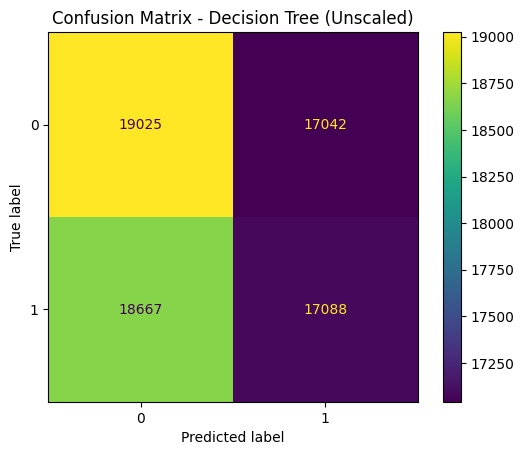

Decision Tree Classifier (Scaled) Results:
Accuracy: 0.5020188800089109
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.52     36067
           1       0.50      0.48      0.49     35755

    accuracy                           0.50     71822
   macro avg       0.50      0.50      0.50     71822
weighted avg       0.50      0.50      0.50     71822



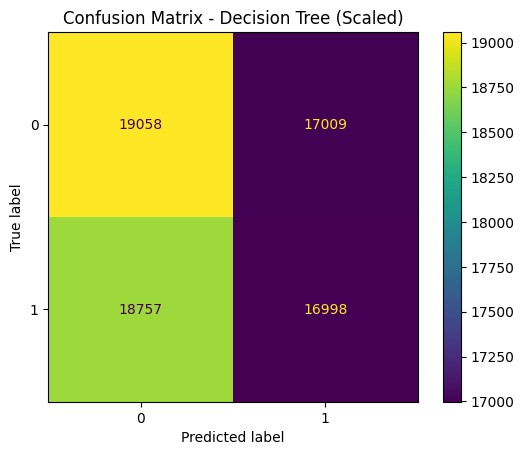

Neural Network Classifier Results:
Accuracy: 0.5003759293809696
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.45      0.48     36067
           1       0.50      0.55      0.52     35755

    accuracy                           0.50     71822
   macro avg       0.50      0.50      0.50     71822
weighted avg       0.50      0.50      0.50     71822



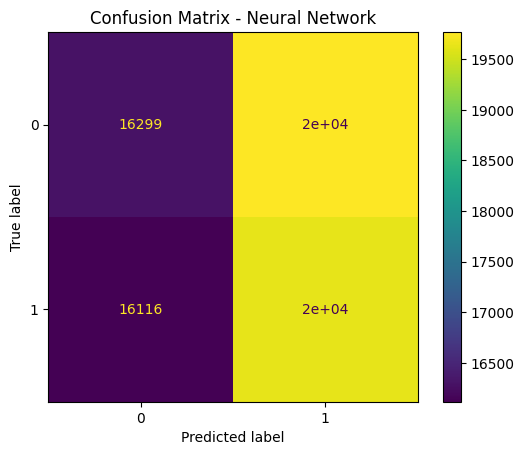

In [45]:
# Decision Tree Classifier (Unscaled)
print("Decision Tree Classifier (Unscaled) Results:")
y_pred_dtc_unscaled = dt_classifier_unscaled.predict(X_test_dtc)
print("Accuracy:", accuracy_score(y_test_dtc, y_pred_dtc_unscaled))
print("Classification Report:\n", classification_report(y_test_dtc, y_pred_dtc_unscaled))
ConfusionMatrixDisplay.from_predictions(y_test_dtc, y_pred_dtc_unscaled)
plt.title("Confusion Matrix - Decision Tree (Unscaled)")
plt.show()

# Decision Tree Classifier (Scaled)
print("Decision Tree Classifier (Scaled) Results:")
y_pred_dtc_scaled = dt_classifier_scaled.predict(X_test_rna)
print("Accuracy:", accuracy_score(y_test_rna, y_pred_dtc_scaled))
print("Classification Report:\n", classification_report(y_test_rna, y_pred_dtc_scaled))
ConfusionMatrixDisplay.from_predictions(y_test_rna, y_pred_dtc_scaled)
plt.title("Confusion Matrix - Decision Tree (Scaled)")
plt.show()

# Neural Network Classifier
print("Neural Network Classifier Results:")
y_pred_nn = nn_classifier.predict(X_test_rna)
print("Accuracy:", accuracy_score(y_test_rna, y_pred_nn))
print("Classification Report:\n", classification_report(y_test_rna, y_pred_nn))
ConfusionMatrixDisplay.from_predictions(y_test_rna, y_pred_nn)
plt.title("Confusion Matrix - Neural Network")
plt.show()